In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import sys
from matplotlib import axis

In [14]:
# read in data
df = pd.read_csv("vary_k_final.csv")
print(df.shape)
df.head()

(1250, 17)


,dataset,explainer,n_trees,max_depth,facet_k,iteration,accuracy,precision,recall,f1,per_valid,avg_dist,avg_length,prep_time,explain_time,sample_time,n_explain
0,cancer,FACETIndex,100,NaN,1,0,0.947368,0.95122,0.906977,0.928571,1.0,0.331958,14.5,24.952665,2.568727,0.128436,20
1,glass,FACETIndex,100,NaN,1,0,0.848485,0.85000,0.894737,0.871795,1.0,0.198250,5.4,19.071943,0.615428,0.030771,20
2,glass,FACETIndex,100,NaN,2,0,0.848485,0.85000,0.894737,0.871795,1.0,0.198250,5.4,19.071943,0.687114,0.034356,20
3,glass,FACETIndex,100,NaN,3,0,0.848485,0.85000,0.894737,0.871795,1.0,0.198250,5.4,19.071943,0.734516,0.036726,20
4,cancer,FACETIndex,100,NaN,2,0,0.947368,0.95122,0.906977,0.928571,1.0,0.331958,14.5,24.952665,3.094185,0.154709,20


In [15]:
# Group by k, dataset taking the average across each iteration
df_grouped = df.groupby(["dataset", "facet_k"], as_index=False).mean() 

df_grouped["explainer"] = "facet"


print(df_grouped.shape) 
df_grouped[["explainer", "dataset", "facet_k", "explain_time", "sample_time"]]

(125, 17)


,explainer,dataset,facet_k,explain_time,sample_time
0,facet,cancer,1,2.961578,0.148079
1,facet,cancer,2,3.362305,0.168115
2,facet,cancer,3,3.437780,0.171889
3,facet,cancer,4,3.494277,0.174714
4,facet,cancer,5,3.557738,0.177887
...,...,...,...,...,...
120,facet,vertebral,21,0.282092,0.014105
121,facet,vertebral,22,0.291077,0.014554
122,facet,vertebral,23,0.296824,0.014841
123,facet,vertebral,24,0.300657,0.015033


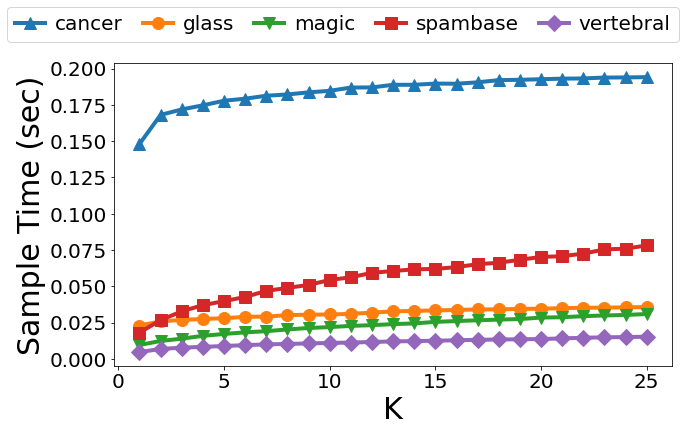

In [16]:
# create viz
fig = plt.figure(figsize=[10, 4.8], frameon=True)
ax = fig.add_subplot(1, 1, 1)
results = df_grouped
xfeature = "facet_k"
yfeature = "sample_time"
line_width = 4
cmap = plt.get_cmap("tab10")
colors = cmap.colors
ds_colors = {
    "cancer": colors[0],
    "glass": colors[1],
    "magic": colors[2],
    "spambase": colors[3],
    "vertebral": colors[4]
}
ds_markers = {
    "cancer": "^",
    "glass": "o",
    "magic": "v",
    "spambase": "s",
    "vertebral": "D"
}
marker_size = 12
line_width = 4
marker_sizes = {
    "cancer": marker_size,
    "glass": marker_size,
    "magic": marker_size,
    "spambase": marker_size,
    "vertebral": marker_size
}
title = None
xlabel = "K"
ylabel = "Sample Time (sec)"
lhorz = True
loc = "upper center"
xrange = None
yrange = None
ylog = False
xlog = False

for ds in results["dataset"].unique():
        is_ds = results["dataset"] == ds
        for expl in results["explainer"].unique():
            is_expl = results["explainer"] == expl
            matching_rows = is_ds & is_expl
            ax.plot(results[matching_rows][xfeature], results[matching_rows][yfeature], label=ds, lw=line_width, marker=ds_markers[ds], ms=marker_sizes[ds], color=ds_colors[ds])

        # title and axis labels
        if title is not None:
            plt.title(title)
        plt.xlabel(xlabel,fontsize=30)
        plt.ylabel(ylabel,fontsize=30)
        # legend
        if lhorz:
            plt.legend(loc=loc, ncol=len(results["dataset"].unique()), bbox_to_anchor=(0, 1.22, 0.82, 0), handletextpad=0.5, columnspacing=1, handlelength=1.5, prop={"size":20})
        else:
            plt.legend(loc=loc)
        # x and y ranges
        if xrange is not None:
            plt.xlim(xrange)
        if yrange is not None:
            plt.ylim(yrange)
        # x and y scales
        if ylog:
            plt.yscale('log')
        if xlog:
            plt.xscale('log')
        plt.subplots_adjust(top=1.0)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)

plt.savefig("vary_k.pdf", bbox_inches="tight")

